In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
import sklearn
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df_master = pd.read_csv("master_12-05.csv", index_col=0)
df_master.describe()


,FIPS,year,CDC Week,Count,Disease_INFLUENZA_A,Disease_INFLUENZA_B,Disease_INFLUENZA_UNSPECIFIED,flu,fluSymptoms,fever,cough,soreThroat,Target,VaxRate,PRCP,SNOW,TAVG,TMAX,TMIN,SNOWDepth
count,20080.000000,20080.000000,20080.000000,20080.000000,20080.000000,20080.000000,20080.000000,18592.000000,18592.000000,18592.000000,18592.000000,18592.000000,19956.000000,9540.000000,18462.000000,15685.000000,18187.000000,18192.000000,18188.000000,15062.000000
mean,36063.424900,2014.174402,24.816434,26.010458,20.003088,5.811604,0.195767,0.026605,0.020833,0.287768,0.256351,0.260344,26.124424,0.555987,0.131613,0.486394,38.083467,46.986435,29.187038,2.208371
std,35.586314,2.992755,18.086529,88.217416,68.727437,29.215823,1.604029,0.090495,0.079796,0.149518,0.178057,0.168710,88.469715,0.089235,0.136317,1.070909,13.208433,14.038245,12.852083,4.444374
min,36001.000000,2009.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.337000,0.000000,0.000000,-5.785714,6.375000,-23.142857,0.000000
25%,36033.000000,2012.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.002475,0.001258,0.204321,0.139920,0.140832,0.000000,0.520000,0.035714,0.000000,28.500000,36.142857,20.714286,0.000000
50%,36065.000000,2014.000000,17.000000,2.000000,1.000000,0.000000,0.000000,0.005558,0.002965,0.271068,0.221400,0.247043,2.000000,0.591000,0.098571,0.000000,37.928571,46.285714,29.500000,0.000000
75%,36095.000000,2017.000000,44.000000,14.000000,10.000000,2.000000,0.000000,0.013376,0.008617,0.355073,0.332691,0.364779,15.000000,0.620000,0.185536,0.500000,48.428571,58.142857,38.428571,2.333333
max,36123.000000,2019.000000,53.000000,2401.000000,1213.000000,1166.000000,92.000000,1.000000,0.915000,1.244567,1.245430,1.016013,2401.000000,0.721000,2.820000,15.000000,70.750000,86.000000,67.000000,38.285714


Features to consider

In [55]:
#List of all the features to consider including target variable
features_withTarget = ['year','CDC Week','Count','PRCP','TAVG','Target', 'SNOWDepth']
target_variable = 'Target'
features = features_withTarget.copy()
features.remove(target_variable)
print(features)
df_master_modified = df_master[features_withTarget]

['year', 'CDC Week', 'Count', 'PRCP', 'TAVG', 'SNOWDepth']


Handling missing data

In [0]:
df_master_modified = df_master_modified.dropna()

Preprocessing

In [0]:
#Divide into features and dependent variable 
X = df_master_modified[features]
y = df_master_modified[target_variable]

#Divide into Training set and test set
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.2, random_state=0, shuffle = False)

#Scaling
mm_scaler = sklearn.preprocessing.MinMaxScaler()
X_train_minMax = mm_scaler.fit_transform(X_train)
X_test_minMax = mm_scaler.transform(X_test)

Linear Regression model

In [58]:
model_regr = sklearn.linear_model.LinearRegression()
model_regr.fit(X_train_minMax, y_train)
y_pred_regression = model_regr.predict(X_test_minMax)
Test_r2_score_regression = metrics.r2_score(y_test, y_pred_regression)
print("R2 Score for Regression on testing data = {}" .format(Test_r2_score_regression * 100))

y_train_pred_regression = model_regr.predict(X_train_minMax)
Train_r2_score_regression = metrics.r2_score(y_train, y_train_pred_regression)
print("R2 Score for Regression on training data = {}" .format(Train_r2_score_regression * 100))

R2 Score for Regression on testing data = 66.9026594034818
R2 Score for Regression on training data = 69.28034110227685


Decision Trees

In [60]:
model_dt = sklearn.tree.DecisionTreeRegressor()
model_dt.fit(X_train_minMax, y_train)
y_pred_decisionTree = model_dt.predict(X_test_minMax)
Test_r2_score_decisionTree = metrics.r2_score(y_test, y_pred_decisionTree)
print("R2 Score for Decision Tree on testing data = {}" .format(Test_r2_score_decisionTree * 100))

y_train_pred_regression = model_dt.predict(X_train_minMax)
Train_r2_score_decisionTree = metrics.r2_score(y_train, y_train_pred_regression)
print("R2 Score for Decision Tree on training data = {}" .format(Train_r2_score_decisionTree * 100))

R2 Score for Decision Tree on testing data = 53.72033043529765
R2 Score for Decision Tree on training data = 99.98829459648519


As the R2 score on training data is much better than testing data, we can say that our model suffers from "High Variance"

feature_importance =  [0.04717302 0.10819868 0.75420586 0.02571819 0.04490328 0.01980097]


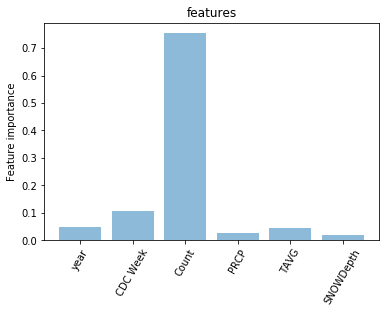

In [61]:
feature_importance = model_dt.feature_importances_
feature_importance_sorted = (np.sort(feature_importance))[::-1]
print("feature_importance = ", feature_importance)

y_pos = np.arange(len(features))
plt.bar(y_pos,feature_importance, align='center', alpha=0.5)
plt.xticks(y_pos, X_train.columns[:len(features)])
plt.ylabel('Feature importance')
plt.title('features')
plt.xticks(rotation=60)

plt.show()

In [65]:
model_rf = sklearn.ensemble.RandomForestRegressor(n_estimators = 500)
model_rf.fit(X_train_minMax, y_train)
y_train_pred_randomForest = model_rf.predict(X_test_minMax)
Test_r2_score_randomForest = metrics.r2_score(y_test, y_train_pred_randomForest)
print("R2 Score for Random Forest on testing data = {}" .format(Test_r2_score_randomForest * 100))

y_train_pred_randomForest = model_rf.predict(X_train_minMax)
Train_r2_score_randomForest = metrics.r2_score(y_train, y_train_pred_randomForest)
print("R2 Score for Random Forest on training data = {}" .format(Train_r2_score_randomForest * 100))

R2 Score for Random Forest on testing data = 75.89860397400827
R2 Score for Random Forest on training data = 98.09278511014598


feature_importance =  [0.03588732 0.09858763 0.76796948 0.02975438 0.048538   0.01926319]


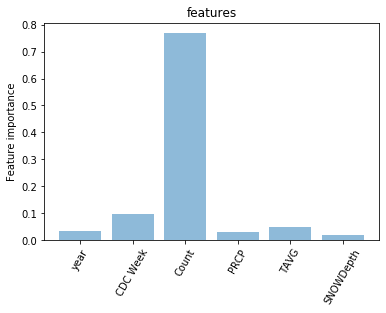

In [64]:
feature_importance = model_rf.feature_importances_
feature_importance_sorted = (np.sort(feature_importance))[::-1]
print("feature_importance = ", feature_importance)

y_pos = np.arange(len(features))
plt.bar(y_pos,feature_importance, align='center', alpha=0.5)
plt.xticks(y_pos, X_train.columns[:len(features)])
plt.ylabel('Feature importance')
plt.title('features')
plt.xticks(rotation=60)

plt.show()